In [2]:
%endpoint http://query.wikidata.org/sparql
%format any
%display table
%show all

Endpoint set to: http://query.wikidata.org/sparql
Request format: ANY
Display: table
Result maximum size: unlimited

In [1]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
import csv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Introduction.

The study aims at addressing the widely-discussed issue of whether a relationship exists between creativity and mental illness. It adopts a data-oriented approach, exploring information present on Wikidata ('a collaboratively edited multilingual knowledge graph hosted by the Wikimedia Foundation'). In particular, it retrieves and analyses data about renowned creators (artists, scientists, inventors etc.) and their mental health.

ADD INFO ABOUT STRUCTURE OF THE NOTEBOOK: STRUCTURE AND THEN DATA INVESTIGATION.

# A. Structure investigation: an insight into Wikidata hierarchy. 

In the following paragraphs, we are going to inspect the structure of Wikidata in order to determine which classes and subclasses should be included in our research. In particular, we are going to analyse information about creative people and mental disorders and how it is recorded in the knowedge base.

# 1. Creativity.

To retrieve information about creative people, we examine data about people with a creative profession. On Wikidata, information about individuals' jobs can be retrieved via the 'P106' (occupation) property, which links each person with their profession. Professions are grouped into superclasses: for example, 'writer', 'actor' and 'musician' are all subclasses of the class 'artist'. In order to get an insight into the structure of the knowledge base and therefore be able to select the subclasses that will be most useful for our purposes, we ask Wikidata about the class ‘Creator’(Q2500638), which seems to be generic enough to provide us with useful information. 


# The class 'creator'

We retrieve all subclasses of the class 'creator via the following query:

In [14]:
select ?job ?jobLabel
where {?job wdt:P279  wd:Q2500638; #job is subclass of creator
            rdfs:label ?jobLabel. 
        FILTER (lang(?jobLabel) = "en")}

job,jobLabel
http://www.wikidata.org/entity/Q131062,urban planner
http://www.wikidata.org/entity/Q205375,inventor
http://www.wikidata.org/entity/Q482980,author
http://www.wikidata.org/entity/Q483501,artist
http://www.wikidata.org/entity/Q1294787,artisan
http://www.wikidata.org/entity/Q1954172,muse
http://www.wikidata.org/entity/Q3499072,chef
http://www.wikidata.org/entity/Q3630699,game designer
http://www.wikidata.org/entity/Q4479442,organizational founder
http://www.wikidata.org/entity/Q5096974,chief content officer


From the above table, we select some jobs of interest for our objectives: inventor (Q205375), director (Q3455803), innovator (Q3492227), author (Q482980), artist (Q483501), designer (Q5322166). 'Director' and 'Designer', though, are subclasses of 'Artist', so we will use this superclass to gather information about these specific occupations.

# Others.

Further analysing the chosen classes and their respective subclasses, we decide to discard some other occupation classes: non-fiction writer (Q15980158), journalists and linguists (Q108289407) editor (Q1607826), music teacher (Q2675537), model (Q4610556), content creator (Q109459317), entertainer (Q138858), professional wrestler (Q13474373), athlete (Q2066131), television presenter (Q947873), voice actor(Q2405480), sex worker (Q852857), hairdresser (Q55187), artisan (Q1294787), manufacturer (Q13235160), narrator (Q755070), Internet user (Q115460164), taxonomist (Q1907198), cartographer (Q1734662), software developer (Q183888), digital creator (Q111263847), translator-interpreter (Q1790480), producer (Q47541952).

# 2. Mental disorders.

As we did for creativity, we identify a class ('mental disorder') that is generic enough to include information of interest regarding mental health and analyze its subclasses in order to get, once again, an insight into Wikidata's structure.

In [ ]:
select ?disorder ?disLab
where {?disorder wdt:P279+  wd:Q12135; 
                rdfs:label ?disLab. 
        FILTER (lang(?disLab) = "en")}

In [3]:
all_disturbs = pd.read_csv('allDisturbs.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = all_disturbs.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

,disorder,disLab
0,http://www.wikidata.org/entity/Q1001920,hallucinogen persisting perception disorder
1,http://www.wikidata.org/entity/Q1002195,autosomal recessive limb-girdle muscular dystrophy type 2K
2,http://www.wikidata.org/entity/Q1009193,counting disorders associated with genetic disease
3,http://www.wikidata.org/entity/Q1010522,gymnophobia
4,http://www.wikidata.org/entity/Q101245788,dementia with Lewy bodies
5,http://www.wikidata.org/entity/Q101402572,immature personality disorder
6,http://www.wikidata.org/entity/Q1019940,Borjeson-Forssman-Lehmann syndrome
7,http://www.wikidata.org/entity/Q102104887,neuronal intermediate filament inclusion disease
8,http://www.wikidata.org/entity/Q102186530,poor enunciation
9,http://www.wikidata.org/entity/Q102186555,insomnia with sleep apnea


# Mental disorders: class hierarchy.

The last query produced a chaotic result, in which different types of disorders are mixed up, as well as different levels. For example, both 'borderline personality disorder' and 'narcissistic personality disorder' are part of the broader class of personality disorders, while 'major depressive disorder' and 'bipolar disorder' fall under the category of mood disorders. For the sope of our research, we would like to maintain different kinds of disturbs separated and grouped under broader categories, so we further investigate the structure of Wikidata by asking about the taxonomic arrangement of the 'mental disorders' classes.

In [ ]:
SELECT ?firstClassDisorderLabel (group_concat(DISTINCT ?secondClassDisorderLabel;separator=", ") as ?secondClassDisorders) (group_concat(DISTINCT ?lastClassLabel;separator=", ") as ?lastClassDisorders)
WHERE {?firstClassDisorder wdt:P279 wd:Q12135; rdfs:label ?firstClassDisorderLabel. 
	    OPTIONAL {?secondClassDisorder wdt:P279 ?firstClassDisorder; rdfs:label ?secondClassDisorderLabel.
		?lastClass wdt:P279 ?secondClassDisorder; rdfs:label ?lastClassLabel.
		FILTER (LANG(?secondClassDisorderLabel) = "en")
		FILTER (LANG(?lastClassLabel) = "en")}. 
        FILTER (LANG(?firstClassDisorderLabel) = "en") .
		
}
GROUP BY ?firstClassDisorderLabel 

In [3]:
mental_disturbs_hierarchy = pd.read_csv('mentalDisturbsHierarchy.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = mental_disturbs_hierarchy.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)


,firstClassDisorderLabel,secondClassDisorders,lastClassDisorders
0,adjustment disorder,"maladjustment, hospitalism, culture shock","spoiled person, quasi-autism, anaclitic depression, Jerusalem syndrome"
1,anxiety,"phobia, fear, mathematical anxiety, eco-anxiety","kinesiophobia, social anxiety disorder, driving phobia, childhood fear, childhood phobia, heptadecaphobia, acalculia, collective fear, numerophobia, chromophobia, tokophobia, tetraphobia, Mathematical disorder, Fear of Being Offline, Ecophobia, dyscalculia, fear of commitment, Climate psychosis, Red Scare, trypophobia, apeirophobia, agoraphobia, specific phobia, triskaidekaphobia, phobia, bathmophobia, negrophobia, ombrophobia, surdophobia, Fear of God, abandonment anxiety, amaxophobia, test anxiety, theophobia, afrophobia, phallophobia, loss aversion"
2,arithmomania,nan,nan
3,At risk mental state,nan,nan
4,autovampirism,nan,nan
5,bipolar and related disorders,bipolar spectrum,schizoaffective disorder
6,body-focused repetitive behavior disorders,"excoriation disorder, nail biting, trichotillomania","Factitious dermatitis, perionychophagia, Excoriated acne, Onychotillomania, trichophagia"
7,challenges in planning or solving problems,nan,nan
8,cognitive disorder,"anxiety disorder, dementia, cognitive deficit, amnesia, Delirium, cognitive dysfunction, psychotic disorder, prosopagnosia","cluster C personality disorder, senile dementia, frontotemporal dementia, post-traumatic stress disorder, Subcortical dementia, obsessive-compulsive disorder, intellectual disability, separation anxiety disorder, rapidly progressive dementia, substance-induced anxiety disorder, Early onset dementia, borderline intellectual functioning, Transient epileptic amnesia, Hypermerimna, social anxiety disorder, Godot's syndrome, transient global amnesia, dissociative amnesia, psychopharmacological delirium, Lewy body dementia, presenile dementia, school refusal, delirium acutum, Guadeloupean parkinsonism, retrograde amnesia, drug-induced persisting amnestic disease, drug-induced delirium, subacute delirium, post ICU amnesia, neurotic disorder, delirium tremens, phobia, mixed dementia, lovesickness, acute stress reaction, fear of intimacy, death anxiety, Complications of traumatic brain injury, anterograde amnesia, cognitive inertia, anxiety neurosis, childhood amnesia, vascular dementia, Drug-induced amnesia, Intensive care unit delirium, fixation amnesia, schizophrenia, selective mutism, panic disorder, Memory erasure, neurosyphilis, Pseudosenility, fugue state, mixed anxiety-depressive disorder, Katagelasticism, body-focused obsession, Limbic-predominant age-related TDP-43 encephalopathy, schizoaffective disorder, neurodegenerative disease with dementia, Lacunar amnesia, bradyphrenia, organic anxiety disorder, posterior cortical atrophy, genetic dementia, cerebrovascular dementia, character amnesia, sundowning, stranger anxiety, Skumin syndrome, muttering delirium, selective memory loss, generalized anxiety disorder, infectious disease with dementia, cortical dementia, presbyophrenia, prosopagnosia, hereditary, source amnesia, oneirism, diffuse neurofibrillary tangles with calcification"
9,confusion with time and space,topographical agnosia,Developmental topographical disorientation


Although the hierarchy we obtained is still a little messy, we will take advantage of it to keep different types and levels of disturbs separated and grouped, later mapping them to the DSM-5 categories.

# B. Data investigation

Now that we have gained a deeper understanding of Wikidata's organization, we can move on and interrogate it taking advantage of the classes and properties we have identified so far.

# Counting people on Wikidata.

Our first query is about how many people are present on Wikidata. 

In [12]:
SELECT (COUNT(?person) AS ?peopleCount)
WHERE {
	?person wdt:P31/wdt:P279* wd:Q5  .
}

peopleCount
11133814


# Counting creative people on Wikidata

Given the occupations we have selected, we now ask Wikidata about the number of 'creative people' (i.e. people who have a 'creative job') it contains.

In [ ]:
SELECT (COUNT(DISTINCT ?creativePerson) as ?creativeCount)
where {
  ?creativePerson wdt:P31 wd:Q5.
  ?creativePerson  wdt:P106 ?occupation .
  {?occupation wdt:P279+ wd:Q205375}  UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}
  MINUS {?occupation wdt:P279+ wd:Q15980158} 
  MINUS {?occupation wdt:P279+ wd:Q108289407} 
  MINUS {?occupation wdt:P279+ wd:Q1607826} 
  MINUS {?occupation wdt:P279+ wd:Q2675537} 
  MINUS {?occupation wdt:P279+ wd:Q4610556}
  MINUS {?occupation wdt:P279+ wd:Q109459317} 
  MINUS {?occupation wdt:P279+ wd:Q138858} 
  MINUS {?occupation wdt:P279+ wd:Q13474373} 
  MINUS {?occupation wdt:P279+ wd:Q2066131}
  MINUS {?occupation wdt:P279+ wd:Q947873} 
  MINUS {?occupation wdt:P279+ wd:Q2405480} 
  MINUS {?occupation wdt:P279+ wd:Q852857}
  MINUS {?occupation wdt:P279+ wd:Q55187}
  MINUS {?occupation wdt:P279+ wd:Q1294787}
  MINUS {?occupation wdt:P279+ wd:Q13235160} 
  MINUS {?occupation wdt:P279+ wd:Q755070}
  MINUS {?occupation wdt:P279+ wd:Q115460164}
  MINUS {?occupation wdt:P279+ wd:Q1907198}
  MINUS {?occupation wdt:P279+ wd:Q1734662}
  MINUS {?occupation wdt:P279+ wd:Q183888}
  MINUS {?occupation wdt:P279+ wd:Q111263847}
  MINUS {?occupation wdt:P279+ wd:Q1790480} 
  MINUS {?occupation wdt:P279+ wd:Q47541952}
}  

The result is **1,819,493**. Compared with the total number of people on Wikidata (11,133,814), it is the 16.3%.

# Data visualization: number of creative people on Wikidata on the total amount of people.

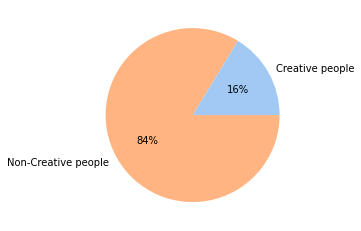

In [30]:
#define data
data = [16.3, 83.7]
labels = ['Creative people', 'Non-Creative people']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# The 10 most common professions on Wikidata.

In [ ]:
SELECT DISTINCT ?occupation (count (distinct ?person) as ?peopleCount)
where {
  ?person wdt:P31 wd:Q5.
  ?person  wdt:P106 ?occupation.
}  
GROUP BY ?occupation
ORDER BY desc (?peopleCount)


| occupation | peopleCount| 
|:--------:|:--------:|
|Researcher|  1,953,657 | 
|  Politician    |  822,018 |  
|  Writer |  360,164 | 
|  Association football player    |  358,219| 
|  Actor  |  325,464 |  
|  University teacher|  244,656| 
|  Painter|  201,353| 
|Basketball player | 171,908|
|Journalist| 164,393|
|Poet | 115,057|

N.B. *politicians and sportspeople: control groups?*

# The 10 most common creative professions on Wikidata.

In [ ]:
SELECT DISTINCT ?occupation (count (distinct ?creativePerson) as ?creativeCount)
where {
  ?creativePerson wdt:P31 wd:Q5.
  ?creativePerson  wdt:P106 ?occupation.
  {?occupation wdt:P279+ wd:Q205375}  UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}
  MINUS {?occupation wdt:P279+ wd:Q15980158} 
  MINUS {?occupation wdt:P279+ wd:Q108289407} 
  MINUS {?occupation wdt:P279+ wd:Q1607826} 
  MINUS {?occupation wdt:P279+ wd:Q2675537} 
  MINUS {?occupation wdt:P279+ wd:Q4610556}
  MINUS {?occupation wdt:P279+ wd:Q109459317} 
  MINUS {?occupation wdt:P279+ wd:Q138858} 
  MINUS {?occupation wdt:P279+ wd:Q13474373} 
  MINUS {?occupation wdt:P279+ wd:Q2066131}
  MINUS {?occupation wdt:P279+ wd:Q947873} 
  MINUS {?occupation wdt:P279+ wd:Q2405480} 
  MINUS {?occupation wdt:P279+ wd:Q852857}
  MINUS {?occupation wdt:P279+ wd:Q55187}
  MINUS {?occupation wdt:P279+ wd:Q1294787}
  MINUS {?occupation wdt:P279+ wd:Q13235160} 
  MINUS {?occupation wdt:P279+ wd:Q755070}
  MINUS {?occupation wdt:P279+ wd:Q115460164}
  MINUS {?occupation wdt:P279+ wd:Q1907198}
  MINUS {?occupation wdt:P279+ wd:Q1734662}
  MINUS {?occupation wdt:P279+ wd:Q183888}
  MINUS {?occupation wdt:P279+ wd:Q111263847}
  MINUS {?occupation wdt:P279+ wd:Q1790480} 
  MINUS {?occupation wdt:P279+ wd:Q47541952}
}  
GROUP BY ?occupation
ORDER BY desc (?creativeCount)


| occupation | creativeCount| 
|:--------:|:--------:|
|  Writer  |  358,859 | 
|  Actor   |  325,264 |  
|  Painter |  201,211 | 
|  Poet    |  114,395| 
|  Singer  |  109,818 |  
|  Composer|  104,892| 
|  Musician|  91,485| 
|Film director| 83,558|
|Screenwriter| 76,278|
|Film actor | 72,287|

# Total number of people affected by mental disorders.

In [5]:
SELECT  (COUNT (DISTINCT ?person) as ?peopleCount) 
WHERE { 
  ?person wdt:P31 wd:Q5. 
  ?person wdt:P1050 ?disorder.
  ?disorder wdt:P279+ wd:Q12135.
}  

peopleCount
2124


# Total number of creative people affected by mental disorders

In [ ]:
SELECT (COUNT(DISTINCT ?creativePerson) as ?creativeCount)
WHERE {
  ?creativePerson wdt:P31 wd:Q5.
  ?creativePerson wdt:P1050 ?disorder.
  ?disorder wdt:P279+ wd:Q12135.
  ?creativePerson  wdt:P106 ?occupation .
  {?occupation wdt:P279+ wd:Q205375}  UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}
  MINUS {?occupation wdt:P279+ wd:Q15980158} 
  MINUS {?occupation wdt:P279+ wd:Q108289407} 
  MINUS {?occupation wdt:P279+ wd:Q1607826} 
  MINUS {?occupation wdt:P279+ wd:Q2675537} 
  MINUS {?occupation wdt:P279+ wd:Q4610556}
  MINUS {?occupation wdt:P279+ wd:Q109459317} 
  MINUS {?occupation wdt:P279+ wd:Q138858} 
  MINUS {?occupation wdt:P279+ wd:Q13474373} 
  MINUS {?occupation wdt:P279+ wd:Q2066131}
  MINUS {?occupation wdt:P279+ wd:Q947873} 
  MINUS {?occupation wdt:P279+ wd:Q2405480} 
  MINUS {?occupation wdt:P279+ wd:Q852857}
  MINUS {?occupation wdt:P279+ wd:Q55187}
  MINUS {?occupation wdt:P279+ wd:Q1294787}
  MINUS {?occupation wdt:P279+ wd:Q13235160} 
  MINUS {?occupation wdt:P279+ wd:Q755070}
  MINUS {?occupation wdt:P279+ wd:Q115460164}
  MINUS {?occupation wdt:P279+ wd:Q1907198}
  MINUS {?occupation wdt:P279+ wd:Q1734662}
  MINUS {?occupation wdt:P279+ wd:Q183888}
  MINUS {?occupation wdt:P279+ wd:Q111263847}
  MINUS {?occupation wdt:P279+ wd:Q1790480}  
  MINUS {?occupation wdt:P279+ wd:Q47541952}
}  

QLever: **1,260**

# Data visualization: creative people affected by mental disorders on total number of people affected by mental disorders.

2.124 people on Wikidata are reported to be affected by mental disorders; 1.260 of them have some kind of creative profession: more than half of them (59%).

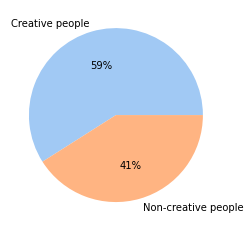

In [31]:
#define data
data = [59, 41]
labels = ['Creative people', 'Non-creative people']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Number of people for mental disorder on Wikidata.

*N.B. Compare results with epidemiological data*

In [9]:
SELECT ?disorderLabel (count(distinct ?person) as ?personNumber)
WHERE {
      ?person wdt:P31 wd:Q5.
      ?person wdt:P1050 ?disorder.
      ?disorder wdt:P279+ wd:Q12135.
      ?disorder rdfs:label ?disorderLabel.
      FILTER (lang(?disorderLabel) = "en")
      
}
GROUP BY ?disorderLabel
ORDER BY DESC (?personNumber)

disorderLabel,personNumber
bipolar disorder,376
dyslexia,289
autism,271
stuttering,190
schizophrenia,135
Asperger syndrome,131
attention deficit hyperactivity disorder,126
mental depression,115
alcoholism,67
dementia,57


# Number of creative people for mental disorder on Wikidata.

In [ ]:
SELECT ?diseaseLabel (count(distinct ?creativePerson) as ?creativesNumber)
WHERE {
      ?creativePerson wdt:P31 wd:Q5.
      ?creativePerson wdt:P31 wd:Q5.
      ?creativePerson  wdt:P106 ?occupation.
      {?occupation wdt:P279+ wd:Q205375}  UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}
      MINUS {?occupation wdt:P279+ wd:Q15980158} 
      MINUS {?occupation wdt:P279+ wd:Q108289407} 
      MINUS {?occupation wdt:P279+ wd:Q1607826} 
      MINUS {?occupation wdt:P279+ wd:Q2675537} 
      MINUS {?occupation wdt:P279+ wd:Q4610556}
      MINUS {?occupation wdt:P279+ wd:Q109459317} 
      MINUS {?occupation wdt:P279+ wd:Q138858} 
      MINUS {?occupation wdt:P279+ wd:Q13474373} 
      MINUS {?occupation wdt:P279+ wd:Q2066131}
      MINUS {?occupation wdt:P279+ wd:Q947873} 
      MINUS {?occupation wdt:P279+ wd:Q2405480} 
      MINUS {?occupation wdt:P279+ wd:Q852857}
      MINUS {?occupation wdt:P279+ wd:Q55187}
      MINUS {?occupation wdt:P279+ wd:Q1294787}
      MINUS {?occupation wdt:P279+ wd:Q13235160} 
      MINUS {?occupation wdt:P279+ wd:Q755070}
      MINUS {?occupation wdt:P279+ wd:Q115460164}
      MINUS {?occupation wdt:P279+ wd:Q1907198}
      MINUS {?occupation wdt:P279+ wd:Q1734662}
      MINUS {?occupation wdt:P279+ wd:Q183888}
      MINUS {?occupation wdt:P279+ wd:Q111263847}
      MINUS {?occupation wdt:P279+ wd:Q1790480}  
      MINUS {?occupation wdt:P279+ wd:Q47541952}
      ?creativePerson wdt:P1050 ?disease.
      ?disease wdt:P279+ wd:Q12135.
      ?disease rdfs:label ?diseaseLabel.
      FILTER (lang(?diseaseLabel) = "en")
}
GROUP BY ?diseaseLabel
ORDER BY DESC (?creativesNumber)

In [42]:
number_creative_disorder = pd.read_csv('numberCreativeForDisorder.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = number_creative_disorder.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

,diseaseLabel,creativesNumber
0,bipolar disorder,238
1,autism,181
2,dyslexia,177
3,stuttering,108
4,schizophrenia,91
5,attention deficit hyperactivity disorder,89
6,mental depression,88
7,Asperger syndrome,87
8,alcoholism,37
9,obsessive-compulsive disorder,34


# For the most common 10 disorders among creative people, percentage of creative affected people on total number of affected people on Wikidata.

N.B. *Should the disorders be the most common ones in genral, or should they be the most common among creative people?*

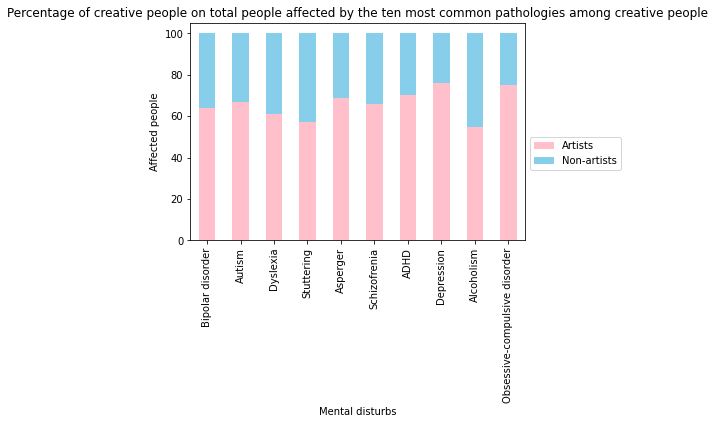

In [34]:
# import necessary libraries
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
 
# create DataFrame
df = pd.DataFrame({'Artists': [64, 67, 61, 57, 69, 66, 70, 76, 55, 75],
                   'Non-artists': [36, 33, 39, 43, 31, 34, 30, 24, 45, 25]
                  },
                  index=['Bipolar disorder', 'Autism', 'Dyslexia', 'Stuttering', 'Asperger', 'Schizofrenia', 'ADHD', 'Depression', 'Alcoholism', 'Obsessive-compulsive disorder'])
 
 
# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['pink', 'skyblue'])

# Put a legend to the right of the current axis
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# labels for x & y axis
plt.xlabel('Mental disturbs')
plt.ylabel('Affected people')
 
# title of plot
plt.title('Percentage of creative people on total people affected by the ten most common pathologies among creative people')
plt.show()

# Creative people, disorders and occupations.

In [ ]:
SELECT DISTINCT ?occupationLabel ?disorderLabel (count (distinct ?artist) as ?artistsNum) 
WHERE {
      ?artist wdt:P106 ?occupation .
	  ?occupation wdt:P279+ wd:Q483501.
      ?occupation rdfs:label ?occupationLabel.
	  {?occupation wdt:P279+ wd:Q205375} UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}  
      ?artist wdt:P1050 ?disorder.
	  ?disorder wdt:P279+ wd:Q12135.
	  ?disorder rdfs:label ?disorderLabel.
      ?disorderClass wdt:P279 wd:Q12135.
	  MINUS {?occupation wdt:P279+ wd:Q15980158} 
      MINUS {?occupation wdt:P279+ wd:Q108289407} 
      MINUS {?occupation wdt:P279+ wd:Q1607826} 
      MINUS {?occupation wdt:P279+ wd:Q2675537} 
      MINUS {?occupation wdt:P279+ wd:Q4610556}
      MINUS {?occupation wdt:P279+ wd:Q109459317} 
      MINUS {?occupation wdt:P279+ wd:Q138858} 
      MINUS {?occupation wdt:P279+ wd:Q13474373} 
      MINUS {?occupation wdt:P279+ wd:Q2066131}
      MINUS {?occupation wdt:P279+ wd:Q947873} 
      MINUS {?occupation wdt:P279+ wd:Q2405480} 
      MINUS {?occupation wdt:P279+ wd:Q852857}
      MINUS {?occupation wdt:P279+ wd:Q55187}
      MINUS {?occupation wdt:P279+ wd:Q1294787}
      MINUS {?occupation wdt:P279+ wd:Q13235160} 
      MINUS {?occupation wdt:P279+ wd:Q755070}
      MINUS {?occupation wdt:P279+ wd:Q115460164}
      MINUS {?occupation wdt:P279+ wd:Q1907198}
      MINUS {?occupation wdt:P279+ wd:Q1734662}
      MINUS {?occupation wdt:P279+ wd:Q183888}
      MINUS {?occupation wdt:P279+ wd:Q111263847}
      MINUS {?occupation wdt:P279+ wd:Q1790480}  
      MINUS {?occupation wdt:P279+ wd:Q47541952}
      FILTER (lang(?disorderLabel) = "en")
	  FILTER (LANG(?occupationLabel) = "en") .
	  }        
GROUP BY ?occupationLabel ?disorderLabel 
ORDER BY DESC(?artistsNum) 

In [43]:
artists_professions_disturbs = pd.read_csv('artistsProfessionsDisturbs.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = artists_professions_disturbs.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

,occupationLabel,disorderLabel,artistsNum
0,actor,bipolar disorder,76
1,actor,dyslexia,70
2,singer,bipolar disorder,64
3,writer,bipolar disorder,62
4,writer,autism,61
5,writer,dyslexia,52
6,film actor,dyslexia,48
7,film actor,bipolar disorder,45
8,singer,dyslexia,45
9,television actor,bipolar disorder,45


In [44]:
def change_occupation_names(occupation):
    if 'actor' in occupation:
        return 'actor'
    else:
        return occupation

In [45]:
artists_professions_disturbs["occupationLabel"] = artists_professions_disturbs["occupationLabel"].apply(change_occupation_names)

In [46]:
artists_professions_disturbs.head(15)

,occupationLabel,disorderLabel,artistsNum
0,actor,bipolar disorder,76
1,actor,dyslexia,70
2,singer,bipolar disorder,64
3,writer,bipolar disorder,62
4,writer,autism,61
5,writer,dyslexia,52
6,actor,dyslexia,48
7,actor,bipolar disorder,45
8,singer,dyslexia,45
9,actor,bipolar disorder,45


In [47]:
artists_professions_disturbs = artists_professions_disturbs.groupby(['occupationLabel', 'disorderLabel']).agg({'artistsNum': "sum"})

In [49]:
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = artists_professions_disturbs.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

In [55]:
sorted_artists_professions_disturbs = artists_professions_disturbs.sort_values(['artistsNum'], ascending=[False])

In [56]:
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = sorted_artists_professions_disturbs.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

FAI VISUALIZZAZIONE

# Creative people with mental disorders: date of birth and death 

In [ ]:
SELECT DISTINCT ?creativeLabel ?yearOfBirth ?yearOfDeath
WHERE {
      ?creative wdt:P106 ?occupation;
              rdfs:label ?creativeLabel;
              wdt:P569 ?dateOfBirth;
              wdt:P570 ?dateOfDeath;
              wdt:P1050 ?medicalCondition.
      ?medicalCondition wdt:P279+ wd:Q12135.
	  ?occupation wdt:P279+ wd:Q483501.
	  {?occupation wdt:P279+ wd:Q205375} UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}. 
	  MINUS {?occupation wdt:P279+ wd:Q15980158} 
      MINUS {?occupation wdt:P279+ wd:Q108289407} 
      MINUS {?occupation wdt:P279+ wd:Q1607826} 
      MINUS {?occupation wdt:P279+ wd:Q2675537} 
      MINUS {?occupation wdt:P279+ wd:Q4610556}
      MINUS {?occupation wdt:P279+ wd:Q109459317} 
      MINUS {?occupation wdt:P279+ wd:Q138858} 
      MINUS {?occupation wdt:P279+ wd:Q13474373} 
      MINUS {?occupation wdt:P279+ wd:Q2066131}
      MINUS {?occupation wdt:P279+ wd:Q947873} 
      MINUS {?occupation wdt:P279+ wd:Q2405480} 
      MINUS {?occupation wdt:P279+ wd:Q852857}
      MINUS {?occupation wdt:P279+ wd:Q55187}
      MINUS {?occupation wdt:P279+ wd:Q1294787}
      MINUS {?occupation wdt:P279+ wd:Q13235160} 
      MINUS {?occupation wdt:P279+ wd:Q755070}
      MINUS {?occupation wdt:P279+ wd:Q115460164}
      MINUS {?occupation wdt:P279+ wd:Q1907198}
      MINUS {?occupation wdt:P279+ wd:Q1734662}
      MINUS {?occupation wdt:P279+ wd:Q183888}
      MINUS {?occupation wdt:P279+ wd:Q111263847}
      MINUS {?occupation wdt:P279+ wd:Q1790480}  
      MINUS {?occupation wdt:P279+ wd:Q47541952}
      BIND(year(?dateOfBirth) AS ?yearOfBirth)
      BIND(year(?dateOfDeath) AS ?yearOfDeath)
      FILTER (lang(?creativeLabel) = "en")
  }
ORDER BY ?yearOfBirth

In [4]:
creatives_birth_death = pd.read_csv('creativesBirthDeath.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = creatives_birth_death.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

,creativeLabel,yearOfBirth,yearOfDeath
0,Demosthenes,-383,-321.000000
1,Sima Xiangru,-178,-116.000000
2,Yang Xiong,-52,18.000000
3,Claudius,-9,54.000000
4,Notker the Stammerer,840,912.000000
5,Ivan IV Vasilyevich,1530,1584.000000
6,Juan Fernández Navarrete,1538,1579.000000
7,Hendrick Avercamp,1585,1634.000000
8,"Luís de Meneses, 3.º Conde da Ericeira",1632,1690.000000
9,Samuel Johnson,1709,1784.000000


In [2]:
filename ="creativesBirthDeath.csv"
lines = list(csv.DictReader(open(filename, 'r', encoding='utf-8')))
centuries = {'antiquity': 0,'XV': 0, 'XVI': 0, 'XVII': 0, 'XVIII': 0, 'XIX': 0, 'XX': 0, 'XXI': 0}
for line in lines:
    date = (int(line['yearOfBirth']))
    if date < 1400:
        centuries['antiquity'] += 1
    if date >= 1400 and date < 1500:
        centuries['XV'] += 1
    if date >= 1500 and date < 1600:
        centuries['XVI'] += 1
    if date >= 1600 and date < 1700:
        centuries['XVII'] += 1
    if date >= 1700 and date < 1800:
        centuries['XVIII'] += 1
    if date >= 1800 and date < 1900:
        centuries['XIX'] += 1
    if date >= 1900 and date < 2000:
        centuries['XX'] += 1
    if date >= 2000:
        centuries['XXI'] += 1
print(centuries)

{'antiquity': 5, 'XV': 0, 'XVI': 3, 'XVII': 1, 'XVIII': 11, 'XIX': 93, 'XX': 353, 'XXI': 0}


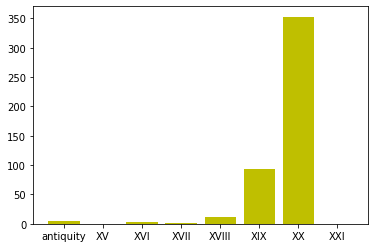

In [3]:
plt.bar(list(centuries.keys()), centuries.values(), color='y')
plt.show()

# Creative people: mental disorders date of birth and death

In [ ]:
SELECT DISTINCT ?creativeLabel ?disorderLabel ?yearOfBirth ?yearOfDeath
WHERE {
      ?creative wdt:P106 ?occupation;
              rdfs:label ?creativeLabel;
              wdt:P569 ?dateOfBirth;
              wdt:P570 ?dateOfDeath;
              wdt:P1050 ?medicalCondition.
      ?medicalCondition wdt:P279+ wd:Q12135.
	  ?medicalCondition rdfs:label ?disorderLabel.
	  ?occupation wdt:P279+ wd:Q483501.
	  {?occupation wdt:P279+ wd:Q205375} UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}. 
	  MINUS {?occupation wdt:P279+ wd:Q15980158} 
      MINUS {?occupation wdt:P279+ wd:Q108289407} 
      MINUS {?occupation wdt:P279+ wd:Q1607826} 
      MINUS {?occupation wdt:P279+ wd:Q2675537} 
      MINUS {?occupation wdt:P279+ wd:Q4610556}
      MINUS {?occupation wdt:P279+ wd:Q109459317} 
      MINUS {?occupation wdt:P279+ wd:Q138858} 
      MINUS {?occupation wdt:P279+ wd:Q13474373} 
      MINUS {?occupation wdt:P279+ wd:Q2066131}
      MINUS {?occupation wdt:P279+ wd:Q947873} 
      MINUS {?occupation wdt:P279+ wd:Q2405480} 
      MINUS {?occupation wdt:P279+ wd:Q852857}
      MINUS {?occupation wdt:P279+ wd:Q55187}
      MINUS {?occupation wdt:P279+ wd:Q1294787}
      MINUS {?occupation wdt:P279+ wd:Q13235160} 
      MINUS {?occupation wdt:P279+ wd:Q755070}
      MINUS {?occupation wdt:P279+ wd:Q115460164}
      MINUS {?occupation wdt:P279+ wd:Q1907198}
      MINUS {?occupation wdt:P279+ wd:Q1734662}
      MINUS {?occupation wdt:P279+ wd:Q183888}
      MINUS {?occupation wdt:P279+ wd:Q111263847}
      MINUS {?occupation wdt:P279+ wd:Q1790480}  
      MINUS {?occupation wdt:P279+ wd:Q47541952}
      BIND(year(?dateOfBirth) AS ?yearOfBirth)
      BIND(year(?dateOfDeath) AS ?yearOfDeath)
      FILTER (lang(?creativeLabel) = "en")
	  FILTER (lang(?disorderLabel) = "en")
  }
ORDER BY ?yearOfBirth

In [5]:
creatives_disorders_dates = pd.read_csv('creativesDisordersDates.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = creatives_disorders_dates.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

,creativeLabel,disorderLabel,yearOfBirth,yearOfDeath
0,Demosthenes,stuttering,-383,-321.000000
1,Sima Xiangru,stuttering,-178,-116.000000
2,Yang Xiong,stuttering,-52,18.000000
3,Claudius,stuttering,-9,54.000000
4,Notker the Stammerer,stuttering,840,912.000000
5,Ivan IV Vasilyevich,paranoia,1530,1584.000000
6,Juan Fernández Navarrete,deaf-mute,1538,1579.000000
7,Hendrick Avercamp,deaf-mute,1585,1634.000000
8,"Luís de Meneses, 3.º Conde da Ericeira",major depressive disorder,1632,1690.000000
9,Samuel Johnson,Tourette syndrome,1709,1784.000000


In [19]:
filename ="creativesDisordersDates.csv"

lines = list(csv.DictReader(open(filename, 'r', encoding='utf-8')))

centuries = {'antiquity': {}, 'XV': {}, 'XVI': {}, 'XVII': {}, 'XVIII': {}, 'XIX': {}, 'XX': {}, 'XXI': {}}

for line in lines:
    disorder = line['disorderLabel']
    try:
        year_of_death = (int(line['yearOfDeath']))
        if year_of_death < 1400:
            if disorder not in centuries['antiquity']:
                centuries['antiquity'][disorder] = 1
            else:
                centuries['antiquity'][disorder] += 1
        if year_of_death >= 1400 and year_of_death < 1500:
            if disorder not in centuries['XV']:
                centuries['XV'][disorder] = 1
            else:
                centuries['XV'][disorder] += 1
        if year_of_death >= 1500 and year_of_death < 1600:
            if disorder not in centuries['XVI']:
                centuries['XVI'][disorder] = 1
            else:
                centuries['XVI'][disorder] += 1
        if year_of_death >= 1600 and year_of_death < 1700:
            if disorder not in centuries['XVII']:
                centuries['XVII'][disorder] = 1
            else:
                centuries['XVII'][disorder] += 1
        if year_of_death >= 1700 and year_of_death < 1800:
            if disorder not in centuries['XVIII']:
                centuries['XVIII'][disorder] = 1
            else:
                centuries['XVIII'][disorder] += 1
        if year_of_death >= 1800 and year_of_death < 1900:
            if disorder not in centuries['XIX']:
                centuries['XIX'][disorder] = 1
            else:
                centuries['XIX'][disorder] += 1
        if year_of_death >= 1900 and year_of_death < 2000:
            if disorder not in centuries['XX']:
                centuries['XX'][disorder] = 1
            else:
                centuries['XX'][disorder] += 1
        if year_of_death >= 2000:
            if disorder not in centuries['XXI']:
                centuries['XXI'][disorder] = 1
            else:
                centuries['XXI'][disorder] += 1
    except:
        if disorder not in centuries['XXI']:
            centuries['XXI'][disorder] = 1
        else:
            centuries['XXI'][disorder] += 1

#print(centuries)

# Creiamo un dizionario contenente tutti i disordini e il rispettivo numero di persone affette.

disorders = dict()
for century in centuries:
    for disorder, number in centuries[century].items():
        if disorder not in disorders:
            disorders[disorder] = number
        else:
            disorders[disorder] += number
#print(disorders)

# Per ogni secolo, calcoliamo la percentuale di ogni disturbo.

percentages = centuries.copy()
for century in centuries:
    tot = 0
    for value in centuries[century].values():
        tot += value
    #print(tot)
    for disorder, number in centuries[century].items():
        # print(century, disorder, number, tot)
        percentages[century][disorder] = number * 100 / tot
#print(percentages)

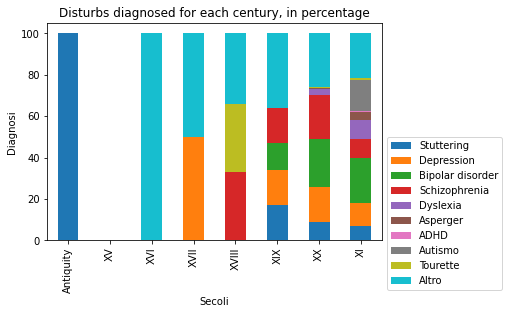

In [16]:
# create DataFrame
df = pd.DataFrame({'Stuttering': [100, 0, 0, 0, 0, 17, 9, 7],
                   'Depression': [0, 0, 0, 50, 0, 17, 17, 11],
                   'Bipolar disorder': [0, 0, 0, 0, 0, 13, 23, 22],
                   'Schizophrenia': [0, 0, 0, 0, 33, 17, 21, 9],            
                   'Dyslexia': [0, 0, 0, 0, 0, 0, 3, 9], 
                   'Asperger':[0, 0, 0, 0, 0, 0, 0.5, 4], 
                   'ADHD': [0, 0, 0, 0, 0, 0, 0, 0.7], 
                   'Autismo': [0, 0, 0, 0, 0, 0, 0, 15], 
                   'Tourette':[0, 0, 0, 0, 33, 0, 0.5, 0.7],             
                   'Altro': [0, 0, 100, 50, 34, 36, 26, 21.6], 
                  },
                  index=['Antiquity', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX', 'XI'])
 
 
df.plot(kind='bar', stacked=True)

# Put a legend to the right of the current axis
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# labels for x & y axis
plt.xlabel('Secoli')
plt.ylabel('Diagnosi')
 
# title of plot
plt.title('Disturbs diagnosed for each century, in percentage')
plt.show()

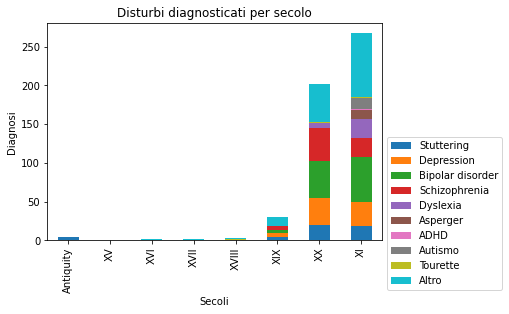

In [18]:
# create DataFrame
# A partire dal dizionario 'centuries'. Accorpiamo i vari disturbi depressivi ('major depressive disorder', 'mental depression', 'chronic depressive disorder'), 
# di bipolarismo ('bipolar disorder, 'bipolar II disorder'), di ADHD ('Attention deficit hyperactivity disorder predominantly inattentive', 'Attention deficit hyperactivity disorder')
df = pd.DataFrame({'Stuttering': [5,0,0,0,0,5,20,18],
                   'Depression': [0,0,0,1,0,5,35,31],
                   'Bipolar disorder': [0,0,0,0,0,4,47,58],
                   'Schizophrenia': [0,0,0,0,1,5,43,25],            
                   'Dyslexia': [0,0,0,0,0,0,6,25], 
                   'Asperger':[0,0,0,0,0,0,1,11], 
                   'ADHD': [0,0,0,0,0,0,0,2], 
                   'Autismo': [0,0,0,0,0,0,0,13], 
                   'Tourette':[0,0,0,0,1,0,1,2],             
                   'Altro': [0,0,2,1,1,11,49,82], 
                  },
                  index=['Antiquity', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX', 'XI'])
 
 
df.plot(kind='bar', stacked=True)

# Put a legend to the right of the current axis
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# labels for x & y axis
plt.xlabel('Secoli')
plt.ylabel('Diagnosi')
 
# title of plot
plt.title('Disturbi diagnosticati per secolo')
plt.show()